### Ćwiczenie 11 - Filtracja górnoprzepustowa
#### Część a: Wykrywanie krawędzi za pomocą maski Sobela

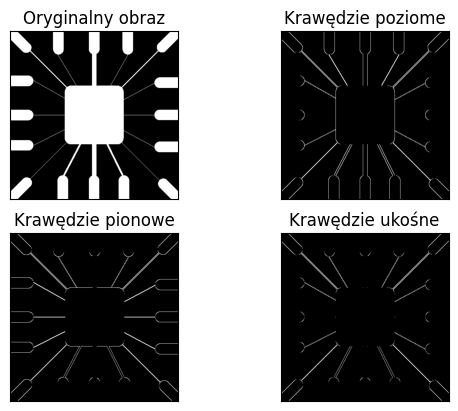

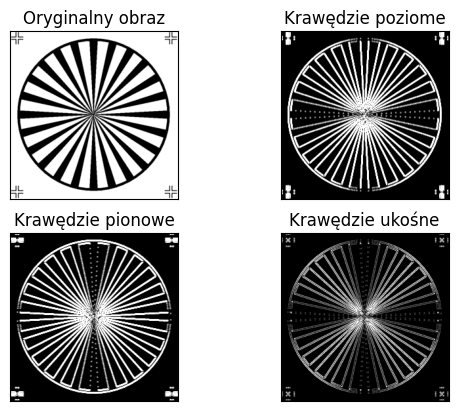

In [6]:
import cv2
import matplotlib.pyplot as plt

def sobel_edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Filtry Sobela
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Krawędzie poziome
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Krawędzie pionowe
    sobel_xy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3) # Krawędzie ukośne
    
    # Konwersja wyników do 8-bitowej skali szarości
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    sobel_xy = cv2.convertScaleAbs(sobel_xy)
    
    # Wyświetlenie wyników
    titles = ['Oryginalny obraz', 'Krawędzie poziome', 'Krawędzie pionowe', 'Krawędzie ukośne']
    images = [img, sobel_x, sobel_y, sobel_xy]
    
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()

# Przykładowe użycie:
sobel_edge_detection('pliki/circuitmask.tif')
sobel_edge_detection('pliki/testpat1.png')

####Część b: Działanie Laplasjanu do wyostrzania szczegółów


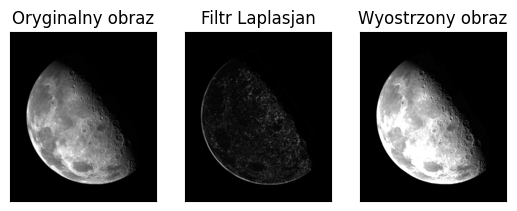

In [7]:
def laplacian_sharpening(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Filtr Laplasjan
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    
    # Wyostrzony obraz
    sharpened_img = cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)
    
    # Wyświetlenie wyników
    titles = ['Oryginalny obraz', 'Filtr Laplasjan', 'Wyostrzony obraz']
    images = [img, laplacian, sharpened_img]
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()

# Przykładowe użycie:
laplacian_sharpening('pliki/blurry-moon.tif')

Część c: Działanie filtrów typu „unsharp masking” i „high boost”


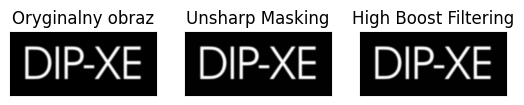

In [8]:
def unsharp_masking(image_path, alpha=1.5, beta=-0.5):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Filtr Gaussowski
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Unsharp masking
    unsharp_mask = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    
    # High boost filtering
    high_boost = cv2.addWeighted(img, alpha, blurred, beta, 0)
    
    # Wyświetlenie wyników
    titles = ['Oryginalny obraz', 'Unsharp Masking', 'High Boost Filtering']
    images = [img, unsharp_mask, high_boost]
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()

# Przykładowe użycie:
unsharp_masking('pliki/text-dipxe-blurred.tif')